In [2]:
!pip install fastbook
!pip install fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.9 MB/s eta 0:00:00a 0:00:01


In [3]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [4]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [5]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [6]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

In [7]:
# from duckduckgo_search import ddg_images
from duckduckgo_search import DDGS
from fastcore.all import *

ddgs = DDGS()

def search_images(term, max_images=150):
    print(f"Searching for '{term}'")
#     return L(ddg_images(term, max_results=max_images)).itemgot('image')
    return L(ddgs.images(keywords=term, max_results=max_images)).itemgot('image')

In [8]:
results = search_images('grizzly bear')
# print(results)
# ims = results.attrgot('contentUrl') - not needed, because search_images returns urls themselves
ims = results 
len(ims)

Searching for 'grizzly bear'


150

['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly+Bear+Wildlife.jpg', 'http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg', 'https://www.publicdomainpictures.net/pictures/240000/velka/grizzly-bear-portrait-1511961987XRY.jpg', 'https://images.pexels.com/photos/162340/bear-bavarian-bear-wild-brown-bear-162340.jpeg?cs=srgb&dl=animal-bear-cute-162340.jpg&fm=jpg', 'https://d3d0lqu00lnqvz.cloudfront.net/media/media/897b2e5d-6d4c-40fa-bbe8-6829455747e2.jpg', 'https://www.expeditionsalaska.com/wp-content/uploads/2017/04/16-brown-bear-photos-2377.jpg', 'https://www.animalfactsencyclopedia.com/images/grizzlybearstanding.jpg', 'https://static01.nyt.com/images/2017/06/23/science/23GRIZZLY/23GRIZZLY-superJumbo.jpg', 'https://1.bp.blogspot.com/_VgXaDXiFvX4/TOLc83-0DII/AAAAAAAAA9Y/aduLWx2jH7w/s1600/grizzly-bear.jpg', 'https://1.bp.blogspot.com/-l-Y6zD_KF6o/UQN3jPgigAI/AAAAAAAAFcU/HOKJWQmNjo4/s1600/Grizzly+Bear-2

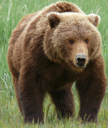

In [9]:

print(ims)
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)
     

im = Image.open(dest)
im.to_thumb(128,128)
     


In [10]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [11]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images(f'{o} bear')
        download_images(dest, urls=results)

Searching for 'grizzly bear'
Searching for 'black bear'
Searching for 'teddy bear'


In [12]:
fns = get_image_files(path)
fns

(#422) [Path('bears/teddy/b6a9a44b-cf39-4437-9efe-ca4b23351875.jpg'),Path('bears/teddy/2fbd962d-ffd3-4acb-b65b-feb9f7996c6c.jpeg'),Path('bears/teddy/95651537-8fb1-404e-bf32-b6417f82ad9c.jpg'),Path('bears/teddy/32ca0df9-aa14-494c-b06d-de93d97a96aa.jpg'),Path('bears/teddy/689bd455-95c8-4bea-882b-5e41900978b7.jpg'),Path('bears/teddy/1d394d3c-bcbc-4d98-870e-7d4a9a7264da.jpg'),Path('bears/teddy/54e0dd9a-3e90-45f0-a9ad-d0f0ab999462.jpg'),Path('bears/teddy/e9515824-e253-484b-9531-65a59fa04387.jpg'),Path('bears/teddy/b316339f-cdd1-48a0-92d0-40e96f7b63c9.jpg'),Path('bears/teddy/a84d19ab-6921-4f72-943d-4f62a5358c99.jpg')...]

In [13]:
failed = verify_images(fns)
failed

(#12) [Path('bears/teddy/85f1c4d6-3513-40b6-811c-847ca05f4888.jpg'),Path('bears/teddy/6dbca0b0-bc1d-426e-937f-7672450fe293.jpg'),Path('bears/teddy/6fcbbe5a-d2f6-4c16-81de-5598811858d1.jpg'),Path('bears/teddy/6527cbb7-0f42-483d-88b4-4a3a2a978662.jpg'),Path('bears/teddy/0cea8bf3-ac2d-46e8-a96a-103c14baf95d.jpg'),Path('bears/teddy/3f14d40c-690c-4db4-a57e-bebf03377be3.JPG'),Path('bears/teddy/d2b76639-a1f7-457b-b88d-361dd32d54f1.jpg'),Path('bears/black/880842b1-331c-43b2-8d74-05ba6f975f94.jpg'),Path('bears/grizzly/b5d7ba3e-76a9-4fc0-82d4-24be1bd103f5.JPG'),Path('bears/grizzly/b458c388-bc44-45c7-a66b-3210fe6e7f77.jpg')...]

In [14]:
failed.map(Path.unlink);

In [15]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls = bears.dataloaders(path)

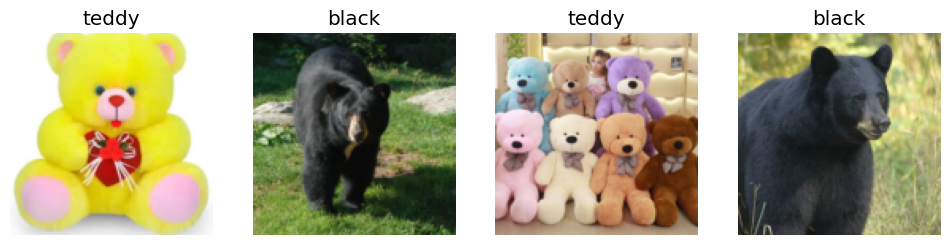

In [17]:
dls.valid.show_batch(max_n=4, nrows=1)

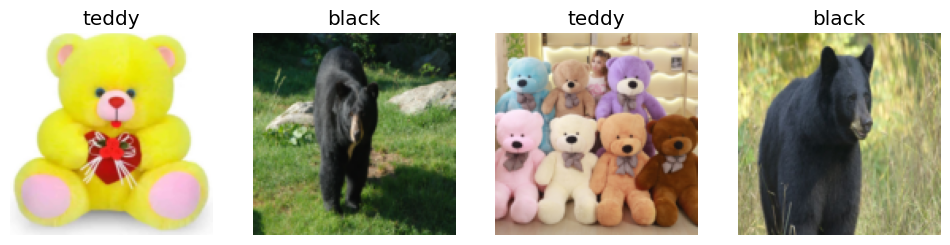

In [18]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)


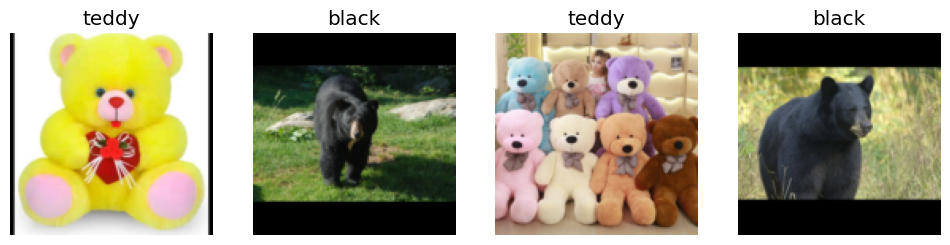

In [19]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

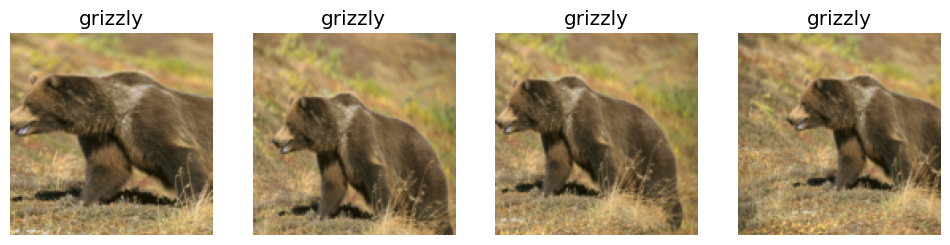

In [20]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

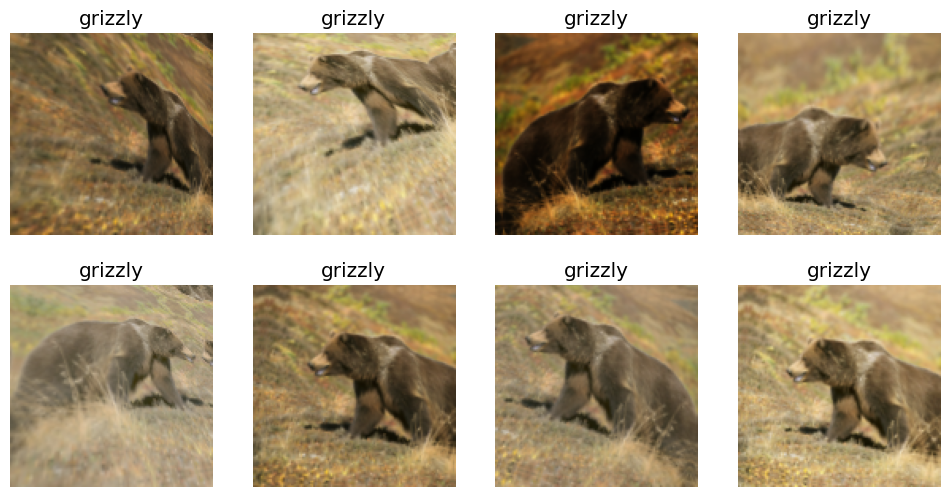

In [21]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [23]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)


In [24]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 67.9MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.264153,0.158580,0.036585,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.196984,0.104667,0.024390,00:15
1,0.156016,0.130130,0.024390,00:16
2,0.113398,0.119882,0.024390,00:16
3,0.095031,0.117414,0.024390,00:16


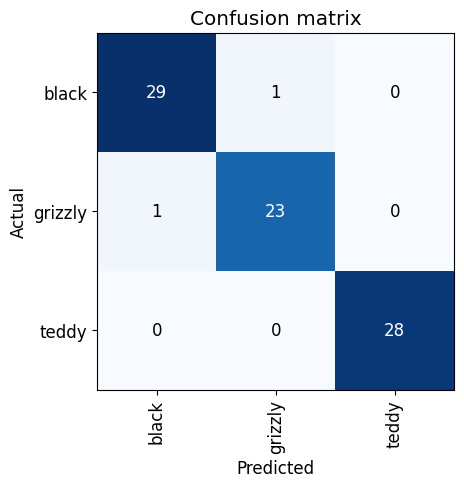

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

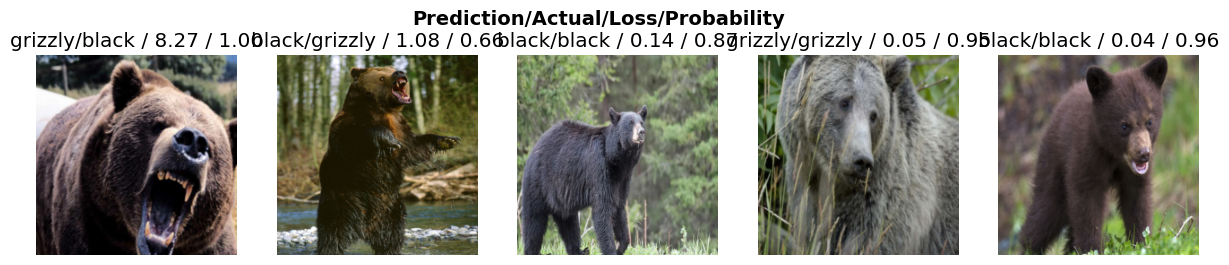

In [26]:
interp.plot_top_losses(5, nrows=1)

In [35]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [36]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [37]:
learn.export()

In [38]:

path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [39]:
learn_inf = load_learner(path/'export.pkl')

In [40]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([9.7781e-05, 9.9990e-01, 3.6622e-08]))

In [41]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [42]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [43]:
img = PILImage.create(btn_upload.data[-1])

In [44]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [45]:
pred,pred_idx,probs = learn_inf.predict(img)

In [46]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: black; Probability: 0.9999')

In [47]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [48]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [50]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [51]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])